# Project 1 Revisited: Importances and Coefficients

## Part 1: Remaking, Saving, and Explaining Your Models
For this part of the project, you will be producing a new version of your final project notebook using the updated tools in sklearn v1.1. 

- Create a new notebook called "Project 1 - Revisited.ipynb" in your project repo.
    - You may either make a copy of your prior notebook that you will modify, or you can start a new blank notebook and copy over the code from your old notebook (as needed).
- Remake your X_train and X_test as DataFrames with the feature names extracted from the column transformer instead of combining your preprocessor and model into 1 pipeline.

## LinearRegression
- Fit and evaluate your LinearRegresion model using your dataframe X_train and X_test data.
- Extract and visualize the coefficients that your model determined.
    - Select the top 3 most impactful features and interpret their coefficients in plain English.
- Save your figure as a .png file inside your repository (you will need this for the final piece of this assignment - Update Your README).

## Tree-Based Model
- Fit and evaluate your tree-based regression model using your dataframe X_train and X_test data.
- Extract and visualize the feature importances that your model determined.
    -Identify the top 5 most important features.
- Save your figure as a .png file inside your repository  (you will need this for the final piece of this assignment - Update Your README).

## Serialize Your Best Models with Joblib
- Once you've finished updating and explaining your models, you must save the following key: value pairs as a dictionary in a joblib file named "best-models.joblib":
    - "preprocessor": your preprocessing  column transformer
    - "X_train": your training features.
    - "X_test": your test features.
    - "y_train": your training target.
    - "y_test": your test target.
    - "LinearRegression": your best linear regression
    - Your tree-based model's class name: your best tree-based model.
        - e.g. "RandomForestRegressor"/"DecisionTreeRegressor"
    - Save your joblib file inside your repository. (You will work with these models again in the next core assignment.)

## Update your README
- Insert your exported figures from above into your README file. You should have the following:
    - Your LinearRegression coefficients plot.
         - Your interpretation of your coefficients.
    - Your tree-based model's feature importances.
        - Your interpretation of your feature importances. 

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import set_config
set_config(display='diagram')
# Modeling
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import joblib
# Set Random State
SEED=321
np.random.seed(SEED)
# Display max columns
pd.set_option('display.max_columns', None)

# Load and Clean Previous Data

In [2]:
# Load and view dataset; Since each row is identified by a unique item ID, I assigned the index as the 'Item_Identifier' column
file='C:\\Users\\Chris Palisoc\\Documents\\Coding Dojo\\Data Sets\\sales_predictions.csv'
df = pd.read_csv(file, index_col='Item_Identifier')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 8523 entries, FDA15 to DRG01
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 799.0+ KB


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,,
FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# Ordinal Encoding for Item Fat Content
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [4]:
df['Item_Fat_Content'].replace({'Low Fat':0 , 'LF':0 , 'low fat':0 , 'Regular':1 , 'reg':1}, inplace=True)

In [5]:
# Ordinal Encoding for Outlet Size
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [6]:
df['Outlet_Size'].replace({'Small':0 , 'Medium':1 , 'High':2}, inplace=True)

In [7]:
# Ordinal Encoding for Outlet Location Type
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [8]:
df['Outlet_Location_Type'].replace({'Tier 1':0 , 'Tier 2':1 , 'Tier 3':2}, inplace=True)

# Preprocessing & Remaking Dataframes

In [9]:
# Define X and y variables
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = SEED)
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
Item_Identifier,,,,,,,,,,
FDI60,7.220,1,0.064142,Baking Goods,61.2510,OUT010,1998,NaN,2,Grocery Store
DRD25,6.135,0,0.079294,Soft Drinks,111.2860,OUT018,2009,1.0,2,Supermarket Type2
NCP18,12.150,0,0.028593,Household,151.0708,OUT035,2004,0.0,1,Supermarket Type1
NCS30,5.945,0,0.093009,Household,127.8652,OUT035,2004,0.0,1,Supermarket Type1
FDI08,18.200,1,0.066285,Fruits and Vegetables,247.2092,OUT035,2004,0.0,1,Supermarket Type1


In [10]:
# Make category selector
cat_sel = make_column_selector(dtype_include='object')
# Make number selector
num_sel = make_column_selector(dtype_include='number')
# Make cat pipe
cat_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='MISSING'),
                        OneHotEncoder(drop='if_binary', sparse=False))
# Make num pipe
num_pipe = make_pipeline(SimpleImputer(strategy='mean'))
# preprocessor
preprocessor = make_column_transformer((num_pipe, num_sel),
                                      (cat_pipe, cat_sel),
                                      verbose_feature_names_out=False)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C3853C4880>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='MISSING',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C3853C4C70>)],
                  verbose_feature_names_out=False)

In [11]:
# fit column transformer and get feature names
preprocessor.fit(X_train)
feature_names = preprocessor.get_feature_names_out()
feature_names

array(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1',
       'Outlet_Type_Supermarket Ty

In [12]:
# remake X_train DF's w/feature names
X_train_df = pd.DataFrame(preprocessor.transform(X_train),
                         columns = feature_names, index = X_train.index)
X_train_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
FDI60,7.220,1.0,0.064142,61.2510,1998.0,0.760582,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
DRD25,6.135,0.0,0.079294,111.2860,2009.0,1.000000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
NCP18,12.150,0.0,0.028593,151.0708,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
NCS30,5.945,0.0,0.093009,127.8652,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDI08,18.200,1.0,0.066285,247.2092,2004.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# remaketest X_test DF's w/feature names
X_test_df = pd.DataFrame(preprocessor.transform(X_test),
                         columns = feature_names, index = X_test.index)
X_test_df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
NCY06,15.250000,0.0,0.061531,132.2968,2007.0,0.760582,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
FDZ10,17.850000,0.0,0.044463,127.1020,1997.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
DRF49,7.270000,0.0,0.071078,114.2518,1997.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
FDN23,12.822634,1.0,0.075142,145.8444,1985.0,1.000000,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
NCH54,13.500000,0.0,0.121633,161.6920,1998.0,0.760582,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [14]:
# check if y_test matches X_test_df
y_test.head()

Item_Identifier
NCY06    1696.4584
FDZ10    2024.0320
DRF49    2618.5914
FDN23    3773.7544
NCH54     159.7920
Name: Item_Outlet_Sales, dtype: float64

# Linear Regression

In [15]:
# Define function for calculating and displaying metrics
def evaluate_regression(model, X_train, y_train, X_test, y_test):
    # Train data
    y_pred_train = model.predict(X_train)
    r2_train = metrics.r2_score(y_train, y_pred_train)
    rmse_train = metrics.mean_squared_error(y_train, y_pred_train, squared=False)
    print(f'Training Data:\tR2 = {r2_train:.2f}\tRMSE = {rmse_train:.2f}')
    # Test data
    y_pred_test = model.predict(X_test)
    r2_test = metrics.r2_score(y_test, y_pred_test)
    rmse_test = metrics.mean_squared_error(y_test, y_pred_test, squared=False)
    print(f'testing Data:\tR2 = {r2_test:.2f}\tRMSE = {rmse_test:.2f}')

In [16]:
# Evaluate performance
lin_reg = LinearRegression()
lin_reg.fit(X_train_df, y_train)
evaluate_regression(lin_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R2 = 0.56	RMSE = 1115.00
testing Data:	R2 = 0.56	RMSE = 1164.40


In [17]:
# Extract coefficients
coeffs = pd.Series(lin_reg.coef_, index=feature_names, name='Cefficients')
# coeffs.loc['intercetpt'] = reg.intercept_ <--took out intercept as part of the plot below
coeffs.head()

Item_Weight                  1.067856e+00
Item_Fat_Content             3.142202e+01
Item_Visibility             -2.731753e+02
Item_MRP                     1.560190e+01
Outlet_Establishment_Year   -6.526536e+12
Name: Cefficients, dtype: float64

In [18]:
# rank the top 10 cefficients
top_n = 10
coeff_rank = coeffs.abs().rank().sort_values(ascending=False)
top_n_features = coeff_rank.head(top_n)
coeffs_plot = coeffs.loc[top_n_features.index].sort_values()
coeffs_plot

Outlet_Size                     -1.377442e+14
Outlet_Identifier_OUT035        -7.648520e+13
Outlet_Identifier_OUT046        -6.720516e+13
Outlet_Identifier_OUT019        -5.995675e+13
Outlet_Type_Grocery Store       -5.748564e+13
Outlet_Identifier_OUT027        -4.695275e+13
Outlet_Type_Supermarket Type3   -4.267705e+13
Outlet_Identifier_OUT017         4.786012e+13
Outlet_Location_Type             5.496579e+13
Outlet_Identifier_OUT049         8.359209e+13
Name: Cefficients, dtype: float64

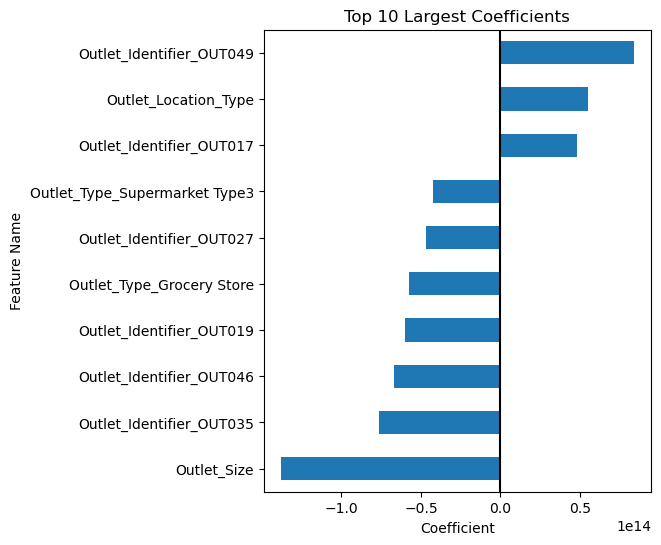

In [19]:
# Visualize coefficients
ax = coeffs_plot.sort_values().plot(kind='barh', figsize=(5,6))
ax.axvline(0,color='k');
ax.set(title = f'Top {top_n} Largest Coefficients', ylabel='Feature Name',
      xlabel='Coefficient');

Based on the above plot, the most impactful features are 'Outlet_Identifier_OUT049', 'Outlet_Identifier_OUT035', and 'Outlet_Size'. What this means is that for every 1 point increase in 'Outlet_Size', the predicted sales price decreases by -1.377442e+14. For every 1 point increase in 'Outlet_Identifier_OUT035', the sales price decreases by -7.648520e+13. Lastly, for every 1 point increase in 'Outlet_Identifier_OUT049', the predicted sales price increases by 8.359209e+13.

# Random Forest

In [20]:
# Evaluate performance of Random Forest Model
for_reg = RandomForestRegressor()
for_reg.fit(X_train_df, y_train)
evaluate_regression(for_reg, X_train_df, y_train, X_test_df, y_test)

Training Data:	R2 = 0.94	RMSE = 423.61
testing Data:	R2 = 0.56	RMSE = 1162.37


In [21]:
# Extract feature importances
feature_importance = pd.Series(for_reg.feature_importances_, index=feature_names,
                               name='Feature Importances')
feature_importance.head()

Item_Weight                  0.053614
Item_Fat_Content             0.008275
Item_Visibility              0.098184
Item_MRP                     0.444440
Outlet_Establishment_Year    0.027445
Name: Feature Importances, dtype: float64

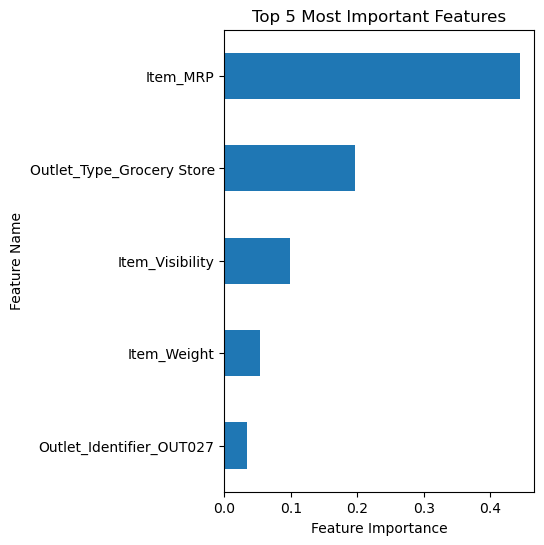

In [22]:
# Plot top 5 most important features
ax = feature_importance.sort_values().tail(5).plot(kind='barh', figsize=(4,6))
ax.set(ylabel='Feature Name', xlabel='Feature Importance',
      title='Top 5 Most Important Features');

# Serialize w/Joblib

In [24]:
# Create a dictionay of all variables
export = {'preprocessor': preprocessor,
         'X_train': X_train,
         'X_test': X_test,
         'y_train': y_train,
         'y_test': y_test,
         'LinearRegression': lin_reg,
         'RandomForestRegressor': for_reg}

joblib.dump(export, 'Project_1_Revisited')

['Project_1_Revisited']